# ゼロから作るDeep Learning

　前回
 - 「損失関数」という指標について  
  代表的な損失関数には、2乗和誤差(4.2.1)と交差エントロピー誤差(4.2.2)というものがある。 
 - 訓練データから無作為にある枚数だけ選び出し(ミニバッチという)、ミニバッチごとに学習を行う。  

### <font color="#00a1e9">4.3 数値微分</font>
・勾配法では、勾配の情報を使って、進む方向を決めます(4.4 勾配)。ここでは、勾配とはどういうものか、また、どういう性質があるかといったことを説明します。それに先立ち、まずは「微分」の説明から始めたいと思います。

##### <font color="#3cb37a">4.3.1 微分</font>
微分とは、「ある瞬間」の変化の量を表したものです。これは、数式で次のように定義されます。
<p>$$\dfrac {df\left( x\right) }{dx}=\lim _{h\rightarrow 0}\dfrac {f\left( x+h\right) -f\left( x\right) }{h}$$<div style="text-align: right;">(4.4)</div></p> 
式(4.4)は、関数の微分を表した式です。左辺の$\dfrac {df\left( x\right) }{dx}$は、$f\left(x\right)$の$x$についての微分ー$x$に対する$f\left(x\right)$の変化の度合いーを表す記号です。

式(4.4)を参考に、関数の微分を求めるプログラムを実装をしてみよう。

In [1]:
#　悪い実装例
def numerical_diff(f, x):
    h = 10e-50 # 1e-50?
    return (f(x+h) - f(x) / h)

**注意点1**  
 - 丸め誤差  
 **$\lim _{h\rightarrow 0}$**の計算にできる限り小さな値として、hに1e-50という非常に小さな値を用いたところ、コンピュータ内（もしくはプログラミング言語内)で定めた最小値の規定(仕様)を下回ってしまい、本来の値と誤差が生じる。これは、表現できる桁で切り捨てや四捨五入が行われために発生する。実際に、1e-50をfloat32型(というデータ型)で表示させたところ、0.0となり正しく表示されないことがわかる(下コード)。対策として、**$10^{-4}$**(1e-4)を用いると良い結果が得られることがわかっている。 

In [2]:
import numpy as np
# 1e-50 = 0.00..1の0が50個続く数
print(str(np.float32(1e-50)) + "（丸め誤差）")

0.0（丸め誤差）


In [3]:
# 1e-4 = 0.0001 
print(str(np.float32(1e-4)) + "（正しく表示）")

0.0001（正しく表示）


**注意点2**  
 - 関数fの差分  
 先の実装例では、$x+h$と$x$の間での関数$f$の差分を計算していますが、この計算では誤差が生じる(図4−5)。真の微分は、$x$の位置での関数の傾き(接線)に対応するが、今回の実装で行なっている微分では、$(x+h)$と$x$の傾きに対応している。そのため、接線と今回実装する値は、厳密には一致しない。この差異は、$h$を無限に0へと近づけることができないために生じる。  
 
 
 - 図4-5(一部改変[^1]） 真の微分（接線）と数値微分(近似による接線)の値は異なる。
![図4-5](TH400_0070-01.jpg)  
[^1]:中央差分、前方差分、後方差分を追加(http://gihyo.jp/dev/serial/01/java-calculation/0070)

注意点2で触れたように、数値微分には誤差が含まれます(図4-5)。この誤差を減らす工夫として、$(x+h)$と$(x-h)$での関数$f$の差分を計算することで誤差を減らすことができる。この差分は、$x$を中心として、その前後の差分を計算することから**中心差分**と言う。（一方、$(x+h)$と$x$の差分は**前方差分**という）。注意1、2を踏まえ、コードを下記のとおり修正した。

In [4]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

##### <font color="#3cb37a">4.3.2 数値微分の例</font>

数値微分を使って、下記の2次関数の微分を行う。
$$y=0.01x^2+0.1x$$<div style="text-align: right;">(4.5)</div>  

この式(4.5)をPythonで実装すると、  

In [86]:
def function_1(x):
    return 0.01*x**2 + 0.1*x 

となる。前節4.3.1の導関数に加え、式(4.5)とグラフを生成するコードは以下のとおり。

In [6]:
import matplotlib.pylab as plt
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)
plt.show()

print('{0:>115}'.format('図4-6'))

NameError: name 'function_1' is not defined

0.1999999999990898
0.2999999999986347


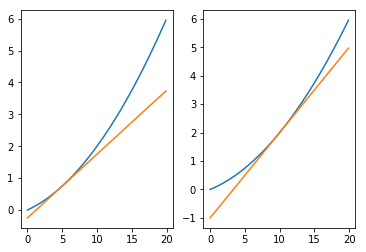

                                                                                                               図4-7


In [139]:
#　接線を求める式
def tangent_line(f, x):
    d = numerical_diff(f, x) #入力されたxに対する微分の計算
    print(d)                 # d=微分の値を表示
    y = f(x) - d*x           # 接線の切片を計算
    return lambda t: d*t + y # 接線の式を返す　引数のtには、下コードのtf(x)のxが代入される

# グラフを描画
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)                          # lambd tにxを代入

plt.subplot(121)
plt.plot(x, y)
plt.plot(x, y2)
plt.subplot(122)
tf = tangent_line(function_1, 10)
y2 = tf(x)
plt.plot(x, y)
plt.plot(x, y2)

plt.show()
print('{0:>115}'.format('図4-7'))

ここで計算した微分の値は、$x$に対する$f(x)$の変化量となる。$x=5,10$それぞれの微分の値は、解析的に求めた微分の値とは厳密に一致しないが、その誤差は非常に小さいことがわかる。この結果から、ほとんど同じ値と見なすことができる。

##### <font color="#3cb37a">4.3.3 偏微分</font>

続いて式(4.6)で表される関数について見ていきます。引数の二乗和を計算する式ですが、変数が２つあることに注意。
<p>$$f \left( x_{0},x_{1}\right) =x^{2}_{0}+x^{2}_{1}$$<div style="text-align: right;">(4.6)</div></p>
この式をPythonで次のように実装することができる。

In [ ]:
def function_2(x):
    frturn x[0]**2 + x[1]**2
    # または、return np.sum(x**2)

さて、この関数をグラフに描画してみる。結果は、図4-8のように３次元のグラフとなる。

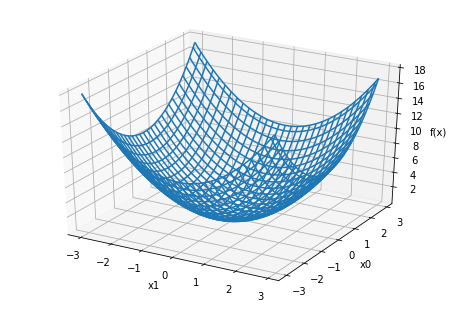

                                                                                                               図4-8


In [151]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
# np.arangeは、連番や等差数列を生成する関数
x0 = np.arange(-3, 3, 0.1)
x1 = np.arange(-3, 3, 0.1)

# 格子点となるx,y座標を作成
x = np.meshgrid(x0, x1)

def f(x):
  # mesh grid には使えない。
  # return np.sum(x**2)
  return x[0]**2 + x[1]**2

y = f(x)

# 描画
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x[0], x[1],  y)
ax.set_xlabel('x1')
ax.set_ylabel('x0')
ax.set_zlabel('f(x)')
plt.show()
print('{0:>115}'.format('図4-8'))

それでは、式(4.6)の微分を求めよう。注意としては、式(4.6)には、変数が２つ($x_{0}$と$x_{1}$)があるということから、どちらの変数に対しての微分かということを区別する必要があります。また、ここで扱うような複数の変数からなる関数の微分を**偏微分**と言います。この偏微分を数式で表すと、それぞれ、$\dfrac {\partial f}{\partial x_{0}}$、$\dfrac {\partial f}{\partial x_{1}}$のように書きます[^2]。  
[^2]:$\partial$をデル、ラウンドディーと読みます。

では、実際に偏微分を解いてみよう。  
* 問1. $x_{0}=3, x_{1}=4$のときの$x_{0}$に対する偏微分$\dfrac {\partial f}{\partial x_{0}}$を求めよ。

In [152]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

* 問1. $x_{0}=3, x_{1}=4$のときの$x_{1}$に対する偏微分$\dfrac {\partial f}{\partial x_{1}}$を求めよ。

In [153]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

問1、問2とも、変数が一つだけの関数を定義して、微分を求めるようなコードとなっている。また、これらの答えは、解析的な微分の解とほぼ一致した。

### <font color="#00a1e9">4.4 勾配</font>

先の例では、偏微分の計算を変数ごとに行なった。ここでは、$x_{0}$と$x_{1}$の偏微分をまとめて計算を行うコードを実装します。たとえば、$x_{0}=3, x_{1}=4$のときの$(x_{0},x_{1})$の両方の偏微分をまとめて、$(\dfrac {\partial f}{\partial x_{0}},\dfrac {\partial f}{\partial x_{1}})$のように、_すべての変数の偏微分をベクトルとしてまとめたものを**勾配(gradient)**といいます。_  

numerical_gradient(f,x)関数は、引数のfは、$\int \left( x_{0},x_{1}\right) =x^{2}_{0}+x^{2}_{1}$、xはNumPy配列(np.array([X,Y]))であるとして、NumPy配列x(= x[idx])の各要素に対しての数値微分を求めています。実際に、numerical_gradient(f, X)関数を使って、実際に勾配を計算してみる。ここでは、点(3,4)、(0,2)、(3,0)での勾配を下記で求める。

In [213]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# 中心差分による数値微分
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)   # Xと同じ形状の0配列を作成しgradに代入
    
    for idx in range(x.size): #range()は、0からx.sizeの値-1までのリストがidxに作成される
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
              
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1: #.ndimは、Xの階層数を返す
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X): # ループ処理を行うときにenumerate()を使うと、要素のインデックスと要素の両方を同時に取得できる
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [209]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [210]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [238]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

このように、$(x_{0},x_{1}$の各点における勾配を計算することができます。上の例では、点(3,4)の勾配は(6,8)、点(0,2)の勾配は(0,4)、点(3,0)の勾配は(6,0)といった結果になります。この勾配の意味を理解するために、$\int \left( x_{0},x_{1}\right) =x^{2}_{0}+x^{2}_{1}$の勾配を図で表してみます。ただし、ここでは勾配の結果に*マイナス*を付けたベクトルを描画しています。

In [228]:
np.array([X,Y]).shape

(2, 324)

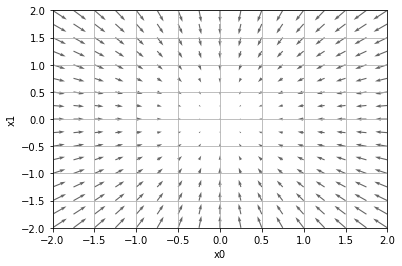

                                                                                                              図4-9　


In [243]:
# 関数
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
     
# グラフ描画
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    #成分
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    #  ベクトル矢印
    #          ┌ 始点 ┐ ┌─── 成分 ────┐
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    #plt.legend()
    plt.draw()
    plt.show()
    print('{0:>115}'.format('図4-9　'))

図4.9から、$\int \left( x_{0},x_{1}\right) =x^{2}_{0}+x^{2}_{1}$の勾配は、向きを持ったベクトル(矢印)として図示されます。図をみると、勾配は、関数$f(x_{0},x_{1})$の「一番低い場所（最小値）を指しているように一点に向いています。また「一番低い場所」から遠く離れれば離れるほど矢印の大きさも大きくなる。今回は、勾配の一番低い場所を指したが、実際は必ずそうなるとも限らない。しかし、勾配は、各地点において低くなる方向を指します。正確に言うならば、勾配がさす方向は、各場所において*関数の値を最も減らす方向*と言えます。

##### <font color="#3cb37a">4.4.1 勾配法</font>

機械学習やニューラルネットワークの問題の多くは、学習の際に最適なパラメータ（重みとバイアス）を学習時に見つけなればならない。ここで最適なパラメータとは、損失関数が最小値をとるときのパラメータの値です。そこで、一般的に複雑な損失関数が最小値（または、できるだけ小さな値）となる最適解を求めて勾配方向へ進むことを繰り返すことで、関数の値を徐々に減らすのが勾配法(gradient method)です。勾配法では、現在の場所から勾配方向に一定の距離だけ進む。そして移動した先でも同様に勾配を求め、また、その勾配方向へ進む これを繰り返し勾配方向へ移動します。この手法は、機械学習の最適化問題でよく使われる手法です。とくにニューラルネットワークの学習では勾配法がよく用いられます。

各地点において関数の値を最も減らす方向を示すのが勾配ということに注意しなければなりません。これは、勾配が指す先が本当に関数の最小値なのかどうか、また、その先が本当に進むべき方向なのかどうか保証されないということです。しかし、その方向に進むことで関数の値を減らすことができることから、勾配の情報を手掛かりに進む方向を決めるべきでしょう。

また、勾配法は、目的が最小値を探すことか、それとも最大値を探すことかによって呼び名が変わります。それぞれ、
* 最小値を探す場合　*勾配降下法*(gradient descent method)
* 最大値を探す場合　*勾配上昇法*(gradient ascent method)
と言います。ただし、損失関数の符号を反転(88ページ）させれば、最小値を探す問題と、最大値を探す問題は同じことになるため、違いは重要ではない。  

一般的に、ニューラルネットワーク（ディープラーニング）の分野では、勾配法は「勾配降下法」として登場することが多くあります。


* 極小値
極小値とは、局所的な最小値、つまりある範囲に限定した場合にのみ最小値となる点です。  
* 鞍点
鞍点とは、ある方向で見れば極大値で、別の方向でみれば極小値となる点です。勾配法は、勾配が0の場所を探しますが、それが必ずしも最小値だとはかぎりません。  

また、関数が複雑で歪な形をしていると、（ほとんど）平らな土地に入り込み、「プラトー」と呼ばれる学習が進まない停滞期に陥ることがあります。  
![鞍点](saddlepoint.png) 


勾配法は、数式で表すと次の式(4.7)のように書くことができます。  
$$x_{0}=x_{0}-\eta \dfrac {\partial f}{\partial x_{0}}$$<div style="text-align: right;">(4.7)</div>  
$$x_{1}=x_{1}-\eta \dfrac {\partial f}{\partial x_{1}}$$  

式(4.7)の$\eta$は、更新の量を表します。ニューラルネットワークの学習においては、*学習率*(learning rate)と呼ばれています。１回の学習でどれだけ学習すべきか、どれだけバラメータを更新するか、ということを決めるのが学習率です。式(4.7)は１回の更新式を示しており、ステップごとに式(4.7)のように変数の値を更新していき、そのステップを何回か繰り返していくことによって、徐々に関数の値を減らしていくのです（式は変数の数によって変わる）。  

学習率の値は、0.01や0.001など前もって何らかの値に決める必要があり、一般的には大きすぎても、小さすぎても「良い場所」にたどり着けない。ニューラルネットワークの学習においては、学習率の値を変更しながら、正しく学習できているかどうか、確認作業を行う。

勾配効果法をPythonで実装すると、次のようになります。

In [244]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.1, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

* 問1. $\int \left( x_{0},x_{1}\right) =x^{2}_{0}+x^{2}_{1}$の最小値を勾配法で求めよ。

In [252]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 100
gd = gradient_descent(function_2, init_x=init_x, lr=lr, step_num=step_num)
gd[0]

array([ -6.11110793e-10,   8.14814391e-10])

最終的な結果は、(-6.1e-10, 8,1e-10)となり、これはほとんど(0, 0)なので、勾配法によってほぼ正しい結果を得ることができたのです。なお、勾配法による更新プロセスを図示すると、図4-10のようになります。原点が最も低い場所ですが、そこへ徐々に近づいていることがわかります。

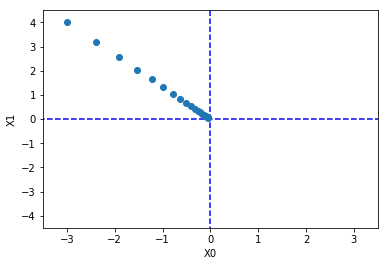

                                                                                                              図4-10


In [254]:
# グラフ描画
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
print('{0:>115}'.format('図4-10'))

つぎに、学習率は、大きすぎても小さすぎても良い結果にならないことを確認します。

In [270]:
# 学習率が大きすぎる例　lr=10.0
init_x = np.array([-3.0, 4.0])    

lr = 10.0
step_num = 100
gd_max = gradient_descent(function_2, init_x=init_x, lr=lr, step_num=step_num)
gd_max[0]

array([ -2.58983747e+13,  -1.29524862e+12])

In [271]:
# 学習率が小さすぎる例　lr=1e-10
init_x = np.array([-3.0, 4.0])    

lr = 1e-10
step_num = 100
gd_max = gradient_descent(function_2, init_x=init_x, lr=lr, step_num=step_num)
gd_max[0]

array([-2.99999994,  3.99999992])

これからの結果から、
* 学習率が大きすぎると、*大きな値*へ発散してしまう。
* 学習率が小さすぎると、*ほとんど更新されずに終わってしまう。
つまり、適切な学習率を設定することが重要な問題になる。  

学習率のようなパラメータは、人の手によって設定され、ハイパーパラメータと言います。ニューラルネットワークの重みのパラメータは訓練データと学習アルゴリズムによって"自動"で獲得されるパラメータと区別しています。